In [1]:
import copy
import numpy as np
from numpy.random import default_rng

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore') 

from DataConversion import ConvertDatasetToBinary_V2, ConvertDatasetToDiscreteK_V2
from DataLoader import LoadData_Abalone, LoadData_Banknote

In [ ]:
# Load Forest Coverage Dataset
from sklearn.datasets import fetch_covtype
X, Y = fetch_covtype(return_X_y=True)
print(X.shape)
print(Y.shape)

In [ ]:
# Load Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target
print(X.shape)
print(Y.shape)

In [ ]:
# Load Abalone Dataset
X, Y = LoadData_Abalone()
print(X.shape)
print(Y.shape)

In [2]:
# Load Banknote Dataset
X, Y = LoadData_Banknote()
print(X.shape)
print(Y.shape)

(1372, 3)
(1372,)


In [3]:
def TestAccurayOnDataset(X, Y, list_keys, num_trials, test_size_ratio):
    
    dict_estimator = {}
    
    for key in list_keys:
        dict_key = {'train': [], 'test': []}
        dict_estimator[key] = dict_key
    
    for i_trial in tqdm(range(0, num_trials)):
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size_ratio)
        
        Classifier_LogReg = LogisticRegression(fit_intercept=True)
        clf_LogReg = Classifier_LogReg.fit(X_train, Y_train)
        score_LogReg_Train = clf_LogReg.score(X_train, Y_train)
        score_LogReg_Test = clf_LogReg.score(X_test, Y_test)
        
        dict_estimator['LogisticRegression']['train'].append(score_LogReg_Train)
        dict_estimator['LogisticRegression']['test'].append(score_LogReg_Test)
        
        
        Classifier_RF = RandomForestClassifier()
        clf_RF = Classifier_RF.fit(X_train, Y_train)
        score_RF_Train = clf_RF.score(X_train, Y_train)
        score_RF_Test = clf_RF.score(X_test, Y_test)
        
        dict_estimator['RandomForest']['train'].append(score_RF_Train)
        dict_estimator['RandomForest']['test'].append(score_RF_Test)
        
        Classifier_NN = MLPClassifier(hidden_layer_sizes=(5,2,2))
        clf_NN = Classifier_NN.fit(X_train, Y_train)
        score_NN_Train = clf_NN.score(X_train, Y_train)
        score_NN_Test = clf_NN.score(X_test, Y_test)
        
        dict_estimator['NeuralNetwork']['train'].append(score_NN_Train)
        dict_estimator['NeuralNetwork']['test'].append(score_NN_Test)
        
        Classifier_LinearSVC = LinearSVC()
        clf_LinearSVC = Classifier_LinearSVC.fit(X_train, Y_train)
        score_LinearSVC_Train = clf_LinearSVC.score(X_train, Y_train)
        score_LinearSVC_Test = clf_LinearSVC.score(X_test, Y_test)
        
        dict_estimator['LinearSVC']['train'].append(score_LinearSVC_Train)
        dict_estimator['LinearSVC']['test'].append(score_LinearSVC_Test)
        
        Classifier_SGD = SGDClassifier()
        clf_SGD = Classifier_SGD.fit(X_train, Y_train)
        score_SGD_Train = clf_SGD.score(X_train, Y_train)
        score_SGD_Test = clf_SGD.score(X_test, Y_test)
        
        dict_estimator['SGD']['train'].append(score_SGD_Train)
        dict_estimator['SGD']['test'].append(score_SGD_Test)
        
        Classifier_GaussianNB = GaussianNB()
        clf_GaussianNB = Classifier_GaussianNB.fit(X_train, Y_train)
        score_GaussianNB_Train = clf_GaussianNB.score(X_train, Y_train)
        score_GaussianNB_Test = clf_GaussianNB.score(X_test, Y_test)
        
        dict_estimator['GaussianNB']['train'].append(score_GaussianNB_Train)
        dict_estimator['GaussianNB']['test'].append(score_GaussianNB_Test)
        
        Classifier_LinearRegression = LinearRegression()
        clf_LinearRegression = Classifier_LinearRegression.fit(X_train, Y_train)
        score_LinearRegression_Train = clf_LinearRegression.score(X_train, Y_train)
        score_LinearRegression_Test = clf_LinearRegression.score(X_test, Y_test)
        
        dict_estimator['LinearRegression']['train'].append(score_LinearRegression_Train)
        dict_estimator['LinearRegression']['test'].append(score_LinearRegression_Test)
        
        Classifier_AdaBoost = AdaBoostClassifier()
        clf_AdaBoost = Classifier_AdaBoost.fit(X_train, Y_train)
        score_AdaBoost_Train = clf_AdaBoost.score(X_train, Y_train)
        score_AdaBoost_Test = clf_AdaBoost.score(X_test, Y_test)
        
        dict_estimator['AdaBoost']['train'].append(score_AdaBoost_Train)
        dict_estimator['AdaBoost']['test'].append(score_AdaBoost_Test)

        kernel = 1.0 * RBF(1.0)
        Classifier_GP = GaussianProcessClassifier(kernel=kernel,random_state=0)
        clf_GP = Classifier_GP.fit(X_train, Y_train)
        score_GP_Train = clf_GP.score(X_train, Y_train)
        score_GP_Test = clf_GP.score(X_test, Y_test)
        
        dict_estimator['GaussianProcess']['train'].append(score_GP_Train)
        dict_estimator['GaussianProcess']['test'].append(score_GP_Test)
        
     
    return dict_estimator
    

In [4]:
def EstimateOneDataset(X, Y, list_keys, num_trials, test_size_ratio, list_check_pts):

    dict_estimator = TestAccurayOnDataset(X, Y, list_keys, num_trials, test_size_ratio)

    dict_train_mean = {var: [] for var in list_keys}
    dict_train_std = {var: [] for var in list_keys}

    dict_test_mean = {var: [] for var in list_keys}
    dict_test_std = {var: [] for var in list_keys}

    for key in dict_estimator.keys():

        if(key in dict_train_mean):

            list_key_est_train_full = dict_estimator[key]['train']
            list_key_est_test_full = dict_estimator[key]['test']

            for chk_pts in list_check_pts:

                list_key_est_train_check_pts = list_key_est_train_full[:chk_pts]
                dict_train_mean[key].append(np.mean(list_key_est_train_check_pts))
                dict_train_std[key].append(np.std(list_key_est_train_check_pts))

                list_key_est_test_check_pts = list_key_est_test_full[:chk_pts]
                dict_test_mean[key].append(np.mean(list_key_est_test_check_pts))
                dict_test_std[key].append(np.std(list_key_est_test_check_pts))
                
    return dict_train_mean, dict_train_std, dict_test_mean, dict_test_std

In [5]:
def PlotResults(list_check_pts, dict_train, dict_test):
    
    for key in dict_train.keys():
        plt.plot(list_check_pts, dict_train[key], '--', label=key+"Train")
        plt.plot(list_check_pts, dict_test[key], label=key+"Test")
        
        plt.legend(bbox_to_anchor=(1.05, 1.0))
        plt.show()

In [6]:
def PlotResultsFromDiffDataset(list_check_pts, list_keys, list_dict_name, list_dict_train, list_dict_test):
    
    for key in list_dict_train[0].keys():
        
        for i_dict in range(0,len(list_dict_name)):
            
            str_name_i = list_dict_name[i_dict]
            dict_train_i = list_dict_train[i_dict]
            dict_test_i = list_dict_test[i_dict]
        
            plt.plot(list_check_pts, dict_train_i[key], '--', label=key+"Train"+str_name_i)
            plt.plot(list_check_pts, dict_test_i[key], label=key+"Test"+str_name_i)
        
        plt.legend(bbox_to_anchor=(1.05, 1.0))
        plt.show()

In [7]:
# Setup Experiment Environment

LIST_EST_KEYS = ['LogisticRegression', 'RandomForest','NeuralNetwork','LinearSVC','SGD','GaussianNB','LinearRegression','AdaBoost', 'GaussianProcess']

NUM_TRIALS = 200

START_TRIAL = 10
STEP_TRIAL = 10
END_TRIAL_EXCLUSIVE = NUM_TRIALS + STEP_TRIAL

LIST_CHECK_PTS = [*range(START_TRIAL, END_TRIAL_EXCLUSIVE, STEP_TRIAL)]
print(LIST_CHECK_PTS)

TEST_SIZE_RATIO = 0.3333

LIST_DICT_NAME = ["Original", "K-Discrete", "Binary"]

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
dict_estimator = TestAccurayOnDataset(X, Y, LIST_EST_KEYS, NUM_TRIALS, TEST_SIZE_RATIO)

dict_train_mean = {var: [] for var in LIST_EST_KEYS}
dict_train_std = {var: [] for var in LIST_EST_KEYS}

dict_test_mean = {var: [] for var in LIST_EST_KEYS}
dict_test_std = {var: [] for var in LIST_EST_KEYS}

for key in dict_estimator.keys():

    if(key in dict_train_mean):
        
        list_key_est_train_full = dict_estimator[key]['train']
        list_key_est_test_full = dict_estimator[key]['test']
        
        for chk_pts in LIST_CHECK_PTS:
            
            list_key_est_train_check_pts = list_key_est_train_full[:chk_pts]
            dict_train_mean[key].append(np.mean(list_key_est_train_check_pts))
            dict_train_std[key].append(np.std(list_key_est_train_check_pts))

            list_key_est_test_check_pts = list_key_est_test_full[:chk_pts]
            dict_test_mean[key].append(np.mean(list_key_est_test_check_pts))
            dict_test_std[key].append(np.std(list_key_est_test_check_pts))


In [ ]:
PlotResults(LIST_CHECK_PTS, dict_train_mean, dict_test_mean)

In [8]:
dict_train_mean_ori, dict_train_std_ori, dict_test_mean_ori, dict_test_std_ori = EstimateOneDataset(X, Y, LIST_EST_KEYS, NUM_TRIALS, TEST_SIZE_RATIO, LIST_CHECK_PTS)

height_bt = 7

type_root = "half"

X_B, dummy_B = ConvertDatasetToBinary_V2(X, X, height_bt, type_root)

dict_train_mean_B, dict_train_std_B, dict_test_mean_B, dict_test_std_B = EstimateOneDataset(X_B, Y, LIST_EST_KEYS, NUM_TRIALS, TEST_SIZE_RATIO, LIST_CHECK_PTS)

K_Bins = 10

X_K, dummy_K = ConvertDatasetToDiscreteK_V2(X, X, K_Bins)

dict_train_mean_K, dict_train_std_K, dict_test_mean_K, dict_test_std_K = EstimateOneDataset(X_K, Y, LIST_EST_KEYS, NUM_TRIALS, TEST_SIZE_RATIO, LIST_CHECK_PTS)


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

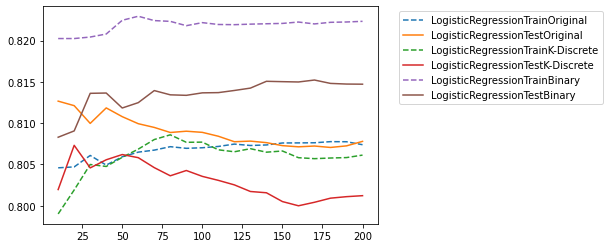

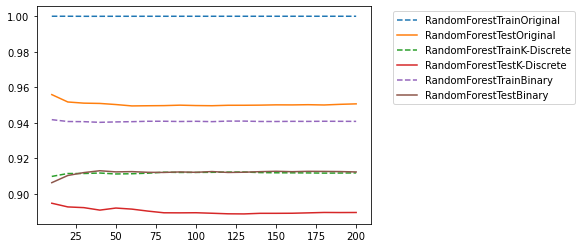

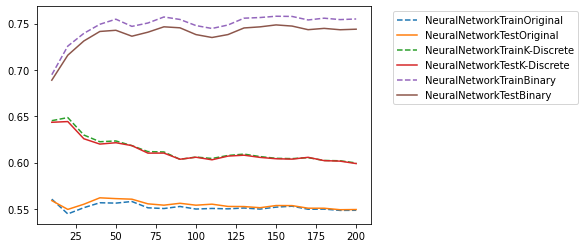

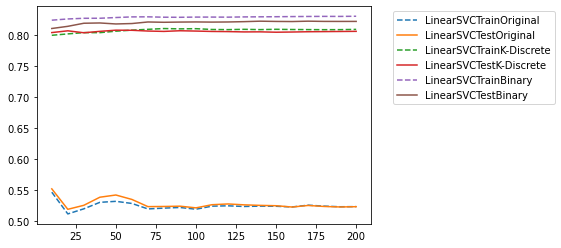

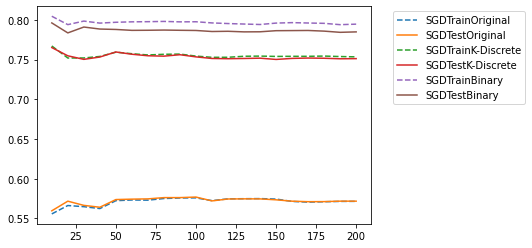

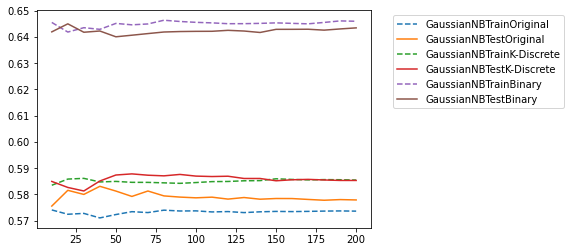

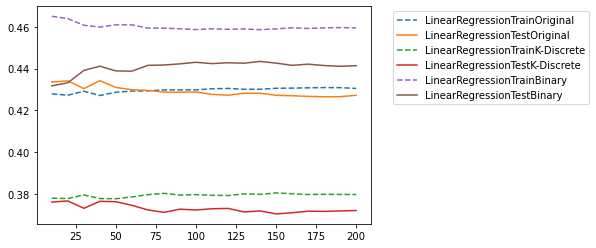

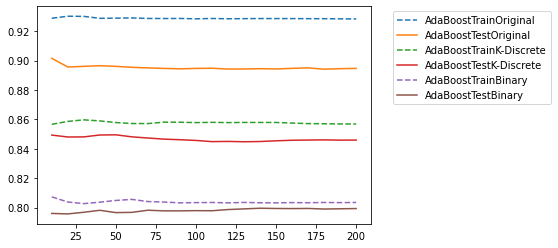

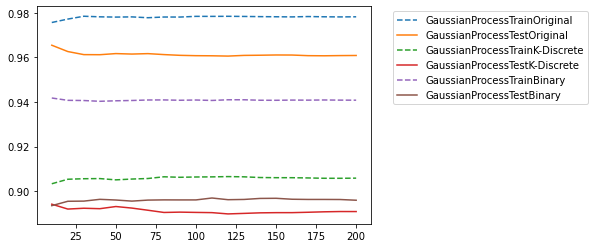

In [9]:
list_dict_train = [dict_train_mean_ori, dict_train_mean_K, dict_train_mean_B]
list_dict_test = [dict_test_mean_ori, dict_test_mean_K, dict_test_mean_B]

PlotResultsFromDiffDataset(LIST_CHECK_PTS, LIST_EST_KEYS, LIST_DICT_NAME, list_dict_train, list_dict_test)